## Exercise - Optimize and save models

### Regression - Optimize and save models

In the previous notebook, we used complex regression models to look at the relationship between features of a bike rentals dataset. [Bir önceki not defterinde, bir bisiklet kiralama veri setinin özellikleri arasındaki ilişkiye bakmak için karmaşık regresyon modelleri kullandık.] In this notebook, we'll see if we can improve the performance of these models even further. [Bu defterde, bu modellerin performansını daha da geliştirip geliştiremeyeceğimizi göreceğiz.]

Let's start by loading the bicycle sharing data as a Pandas DataFrame and viewing the first few rows. [Bisiklet paylaşım verilerini Pandas DataFrame olarak yükleyerek ve ilk birkaç satırı görüntüleyerek başlayalım.] As usual, we'll also split our data into training and test datasets. [Her zamanki gibi, verilerimizi eğitim ve test veri kümelerine de böleceğiz.]

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model

- **y_train**: The corresponding labels we'll use to train the model

- **X_test**: The feature values we'll use to validate the model

- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a boosting ensemble algorithm, as in our last notebook. [Şimdi, son not defterimizde olduğu gibi, bir boosting topluluk algoritması uydurarak bir modeli eğitmeye hazırız.] Recall that a Gradient Boosting estimator, is like a Random Forest algorithm, but instead of building them all trees independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model. [Gradient Boosting tahmincisinin Rastgele Orman algoritması gibi olduğunu hatırlayın, ancak tüm ağaçları bağımsız olarak oluşturmak ve ortalama sonucu almak yerine, her ağaç, kaybı (hata) aşamalı olarak azaltmak amacıyla bir öncekinin çıktıları üzerine kurulur. modelde.]

GradientBoostingRegressor() 

MSE: 104260.60604683023
RMSE: 322.89410965025394
R2: 0.7956036256206118


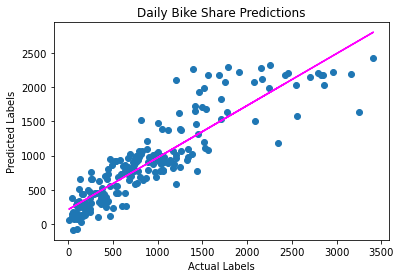

In [2]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Optimize Hyperparameters

Take a look at the **GradientBoostingRegressor** estimator definition in the output above, and note that it, like the other estimators we tried previously, includes a large number of parameters that control the way the model is trained. [Yukarıdaki çıktıdaki GradientBoostingRegressor tahmin edici tanımına bir göz atın ve daha önce denediğimiz diğer tahmin ediciler gibi, modelin eğitilme şeklini kontrol eden çok sayıda parametre içerdiğini unutmayın.] In machine learning, the term parameters refers to values that can be determined from data; values that you specify to affect the behavior of a training algorithm are more correctly referred to as hyperparameters. [Makine öğreniminde parametreler terimi, verilerden belirlenebilen değerleri ifade eder; bir eğitim algoritmasının davranışını etkilemek için belirttiğiniz değerlere daha doğru bir şekilde hiperparametreler denir.]

The specific hyperparameters for an estimator vary based on the algorithm that the estimator encapsulates. [Bir tahminci için belirli hiperparametreler, tahmin edicinin kapsadığı algoritmaya göre değişir.] In the case of the **GradientBoostingRegressor** estimator, the algorithm is an ensemble that combines multiple decision trees to create an overall predictive model. [GradientBoostingRegressor tahmincisi durumunda, algoritma, genel bir tahmine dayalı model oluşturmak için birden çok karar ağacını birleştiren bir topluluktur.] You can learn about the hyperparameters for this estimator in the Scikit-Learn documentation. (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) [Bu tahmin edici için hiperparametreler hakkında Scikit-Learn belgelerinde bilgi edinebilirsiniz.]

We won't go into the details of each hyperparameter here, but they work together to affect the way the algorithm trains a model. [Burada her bir hiperparametrenin ayrıntılarına girmeyeceğiz, ancak algoritmanın bir modeli eğitme şeklini etkilemek için birlikte çalışırlar.] In many cases, the default values provided by Scikit-Learn will work well; but there may be some advantage in modifying hyperparameters to get better predictive performance or reduce training time. [Çoğu durumda, Scikit-Learn tarafından sağlanan varsayılan değerler iyi çalışacaktır; ancak daha iyi tahmin performansı elde etmek veya eğitim süresini azaltmak için hiperparametreleri değiştirmenin bazı avantajları olabilir.]

So how do you know what hyperparameter values you should use? [Peki hangi hiperparametre değerlerini kullanmanız gerektiğini nasıl bileceksiniz?] Well, in the absence of a deep understanding of how the underlying algorithm works, you'll need to experiment. [Temeldeki algoritmanın nasıl çalıştığına dair derin bir anlayışın yokluğunda, denemeniz gerekecek.] Fortunately, SciKit-Learn provides a way to tune hyperparameters by trying multiple combinations and finding the best result for a given performance metric. [Neyse ki SciKit-Learn, birden çok kombinasyonu deneyerek ve belirli bir performans metriği için en iyi sonucu bularak hiperparametreleri ayarlamanın bir yolunu sunar.]

Let's try using a grid search approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator. [GradientBoostingRegressor tahmincisinin learning_rate ve n_estimators hiper parametreleri için olası değerlerin bir ızgarasından kombinasyonları denemek için bir grid arama yaklaşımı kullanmayı deneyelim.]

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 104033.99518126946
RMSE: 322.5430129165248
R2: 0.7960478819996204


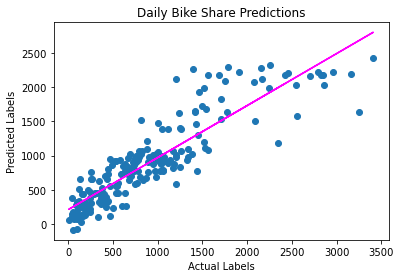

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Note**: The use of random values in the Gradient Boosting algorithm results in slightly different metrics each time. [Not: Gradient Boosting algoritmasında rastgele değerlerin kullanılması, her seferinde biraz farklı ölçümlerle sonuçlanır.] In this case, the best model produced by hyperparameter tuning is unlikely to be significantly better than one trained with the default hyperparameter values; but it's still useful to know about the hyperparameter tuning technique! [Bu durumda, hiperparametre ayarlama ile üretilen en iyi modelin, varsayılan hiperparametre değerleriyle eğitilmiş olandan önemli ölçüde daha iyi olması olası değildir; ama yine de hiperparametre ayarlama tekniğini bilmek faydalıdır!]

### Preprocess the Data

We trained a model with data that was loaded straight from a source file, with only moderately successful results. [Doğrudan bir kaynak dosyadan yüklenen verilerle bir modeli eğittik ve yalnızca orta derecede başarılı sonuçlar elde ettik.]

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. [Pratikte, algoritmanın bir modele uymasını kolaylaştırmak için verilerin bazı ön işlemlerini gerçekleştirmek yaygındır.] There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques: [Verilerinizi modellemeye hazır hale getirmek için gerçekleştirebileceğiniz çok çeşitli ön işleme dönüşümleri vardır, ancak kendimizi birkaç yaygın teknikle sınırlayacağız:]

### Scaling numeric features

Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. [Sayısal özellikleri aynı ölçekte olacak şekilde normalleştirmek, büyük değerlere sahip özelliklerin tahminleri orantısız bir şekilde etkileyen katsayılar üretmesini önler.] For example, suppose your data includes the following numeric features: [Örneğin, verilerinizin aşağıdaki sayısal özellikleri içerdiğini varsayalım:]

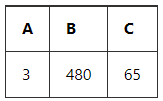

Normalizing these features to the same scale may result in the following values (assuming A contains values from 0 to 10, B contains values from 0 to 1000, and C contains values from 0 to 100): [Bu özelliklerin aynı ölçeğe normalleştirilmesi aşağıdaki değerlerle sonuçlanabilir (A'nın 0 ile 10 arasındaki değerleri içerdiğini, B'nin 0 ile 1000 arasındaki değerleri içerdiğini ve C'nin 0 ile 100 arasındaki değerleri içerdiğini varsayarsak):]

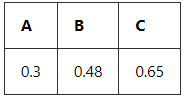

There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same spread of values on a different scale. [Her sütun için minimum ve maksimum değerleri hesaplamak ve 0 ile 1 arasında orantısal bir değer atamak gibi sayısal verileri ölçeklendirmenin birden çok yolu vardır veya aynı yayılımı korumak için normal olarak dağıtılan bir değişkenin ortalama ve standart sapmasını kullanmak. değerleri farklı bir ölçekte]

### Encoding categorical variables

Machine learning models work best with numeric features rather than text values, so you generally need to convert categorical features into numeric representations. [Makine öğrenimi modelleri en iyi şekilde metin değerleri yerine sayısal özelliklerle çalışır, bu nedenle genellikle kategorik özellikleri sayısal temsillere dönüştürmeniz gerekir.] For example, suppose your data includes the following categorical feature. [Örneğin, verilerinizin aşağıdaki kategorik özelliği içerdiğini varsayalım.]

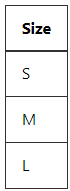

You can apply ordinal encoding to substitute a unique integer value for each category, like this:

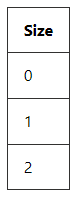

Another common technique is to use one hot encoding to create individual binary (0 or 1) features for each possible category value. For example, you could use one-hot encoding to translate the possible categories into binary columns like this:

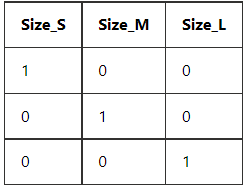

To apply these preprocessing transformations to the bike rental, we'll make use of a Scikit-Learn feature named pipelines. [Bu ön işleme dönüşümlerini bisiklet kiralamaya uygulamak için, boru hatları adlı bir Scikit-Learn özelliğinden yararlanacağız.] These enable us to define a set of preprocessing steps that end with an algorithm. [Bunlar, bir algoritma ile biten bir dizi ön işleme adımı tanımlamamızı sağlar.] You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. [Ardından, modelin tüm ön işleme adımlarını ve regresyon algoritmasını kapsaması için tüm boru hattını verilere sığdırabilirsiniz.] This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data). [Bu yararlıdır, çünkü modeli yeni verilerden değerleri tahmin etmek için kullanmak istediğimizde, aynı dönüşümleri uygulamamız gerekir (eğitim verileriyle kullanılan aynı istatistiksel dağılımlara ve kategori kodlamalarına dayanarak).]

**Note**: The term pipeline is used extensively in machine learning, often to mean very different things! [Not: İşlem hattı terimi, makine öğreniminde yaygın olarak kullanılır ve genellikle çok farklı anlamlara gelir!] In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else. [Bu bağlamda, bunu Scikit-Learn'deki ardışık düzen nesnelerine atıfta bulunmak için kullanıyoruz, ancak başka bir yerde başka bir şey ifade etmek için kullanıldığını görebilirsiniz.]

In [4]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


OK, the model is trained, including the preprocessing steps. Let's see how it performs with the validation data.

MSE: 105317.3828305738
RMSE: 324.52639774072895
R2: 0.793531881063243


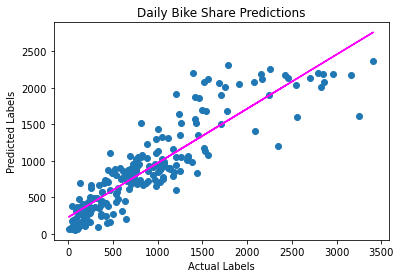

In [5]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The pipeline is composed of the transformations and the algorithm used to train the model. To try an alternative algorithm you can just change that step to a different kind of estimator.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 107097.88089409091
RMSE: 327.2581257877196
R2: 0.7900413263602619


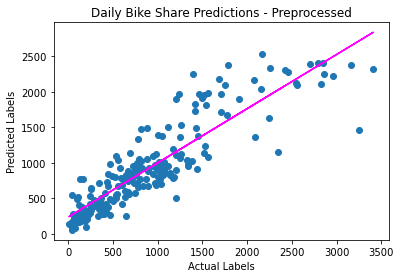

In [6]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

We've now seen a number of common techniques used to train predictive models for regression. [Şimdi, regresyon için tahmine dayalı modelleri eğitmek için kullanılan bir dizi yaygın teknik gördük.] In a real project, you'd likely try a few more algorithms, hyperparameters, and preprocessing transformations; but by now you should have got the general idea. [Gerçek bir projede, muhtemelen birkaç algoritma, hiperparametre ve ön işleme dönüşümü denersiniz; ama şimdiye kadar genel fikre sahip olmanız gerekirdi.] Let's explore how you can use the trained model with new data. [Eğitilmiş modeli yeni verilerle nasıl kullanabileceğinizi keşfedelim.]

### Use the Trained Model

First, let's save the model.

In [7]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called scoring or inferencing.

In [8]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 96 rentals


The model's predict method accepts an array of observations, so you can use it to generate multiple predictions as a batch. [Modelin tahmin yöntemi bir dizi gözlemi kabul eder, böylece bunu toplu olarak birden çok tahmin oluşturmak için kullanabilirsiniz.] For example, suppose you have a weather forecast for the next five days; you could use the model to predict bike rentals for each day based on the expected weather conditions. [Örneğin, önümüzdeki beş gün için bir hava tahmininiz olduğunu varsayalım; modeli, beklenen hava koşullarına göre her gün için bisiklet kiralama tahmininde bulunmak için kullanabilirsiniz.]

In [9]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
554.0
783.0
246.0
173.0
269.0


### Summary

That concludes the notebooks for this module on regression. In this notebook we ran a complex regression, tuned it, saved the model, and used it to predict outcomes for the future.

### Further Reading

To learn more about Scikit-Learn, see the Scikit-Learn documentation.(https://scikit-learn.org/stable/user_guide.html)